# 1 Ojetivo
Implementar el modelo de vecinos mas cercanos KNN con programación Python para resolver la tarea de clasificación de una condición de salud de las personas mediante predicción de anomalías de corazón evaluando la exactitud del modelo mediante la matriz de confusión.

# 2 Descripción
Se cargan librerías y se descargan los datos: https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/heart_2020_cleaned.csv

Los datos están relacionados con aspectos médicos y son valores numéricos de varias variables que caracterizan el estado de salud de 319,795 personas.

Se construye un modelo supervisado basado en el algoritmo de vecinos mas cercanos KNN para resolver la tarea de clasificación binaria e identificar si una persona padece del corazón o no.

Se construye el modelo con sklearn.neighbors import KNeighborsClassifier

Se construyen datos de entrenamiento y validación al 80% y 20% cada uno.

Se desarrollan los modelos de:

Regresión Logística binaria

Árbol de Clasificación tipo class

KNN Vecinos mas cercanos

SVM Lineal

SVM Polinomial

SVM Radial

Los modelo se aceptan si tienen un valor de exactitud por encima del 70%..

# 3 Fundamento teórico
El algoritmo vecinos mas cercanos KNN clasifica cada dato nuevo en el grupo que corresponda, según tenga k vecinos más cerca de un grupo o de otro. Es decir, calcula la distancia del elemento nuevo a cada uno de los existentes, y ordena dichas distancias de menor a mayor para ir seleccionando el grupo al que pertenecer.

Este grupo será, por tanto, el de mayor frecuencia con menores distancias.

El KNN es un algoritmo de aprendizaje supervisado, es decir, que a partir de un juego de datos inicial su objetivo será el de clasificar correctamente todas las instancias nuevas. El juego de datos típico de este tipo de algoritmos está formado por varios atributos descriptivos y un solo atributo objetivo (también llamado clase).

El método K-NN es un método importantes de clasificación supervisada. En el proceso de aprendizaje no se hace ninguna suposición acerca de la distribución de las variables predictoras, es por ello que es un método de clasificación no paramétrico, que estima el valor de la función de densidad de probabilidad o directamente la probabilidad posterior de que un elemento x pertenezca a la clase CjCj a partir de la información proporcionada por el conjunto de entrenamiento.

Es un método bastante sencillo y robusto que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean.

Es un algoritmo muy simple de implementar y de entrenar, pero tienen una carga computacional elevada y no es apropiado cuando se tienen muchos grados de libertad.

# 4 Desarrollo
## 4.1 Cargar librerías
Algunas librerías son nuevas, hay que instalarlas desde R, aquí se indican cuáles librerías y con comentario dado que ya se instalaron previamente.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Estadísticas
import scipy 
from scipy import stats

# Para partir datos entrenamiento y validación
from sklearn.model_selection import train_test_split

# Modelo de Clasificación 
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

## 4.2 Cargar los datos
Se cargan datos del enlace URL, se observan los primeros y últimos registros del conjunto de datos.



In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/danios%20al%20corazon%20numericos%20limpios.csv")
datos

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,1,2,2,3,30,2,1,8,1,1,1,4,5,1,2,1
1,No,20.34,2,2,1,0,0,2,1,13,1,2,1,4,7,2,2,2
2,No,26.58,1,2,2,20,30,2,2,10,1,1,1,5,8,1,2,2
3,No,24.21,2,2,2,0,0,2,1,12,1,2,2,3,6,2,2,1
4,No,23.71,2,2,2,28,0,1,1,5,1,2,1,4,8,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,1,2,2,7,0,1,2,9,6,1,2,5,6,1,2,2
319791,No,29.84,1,2,2,0,0,2,2,4,6,2,1,4,5,1,2,2
319792,No,24.24,2,2,2,0,0,2,1,6,6,2,1,3,6,2,2,2
319793,No,32.81,2,2,2,0,0,2,1,2,6,2,2,3,12,2,2,2


## 4.3 Exploración de datos
Son 319795 observaciones y 18 variables

In [3]:
print("Observaciones y variables: ", datos.shape)


Observaciones y variables:  (319795, 18)


In [4]:
print("Columnas y tipo de dato")
datos.columns

Columnas y tipo de dato


Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
datos.dtypes

HeartDisease         object
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime             int64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

### 4.3.1 Visualización de datos
#### 4.3.1.1 ¿Cuántos casos hay de cada clase?
Hay 292422 casos sin daño al corazón y el resto que si tienen daño 27373.

In [6]:
frecuencia = (datos.groupby("HeartDisease").agg(frecuencia=("HeartDisease","count")).reset_index())
  
frecuencia

,HeartDisease,frecuencia
0,No,292422
1,Yes,27373


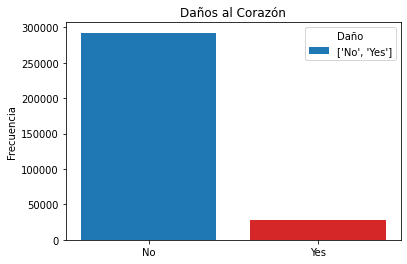

In [8]:
fig, ax = plt.subplots()
# Colores
bar_labels = ['No', 'Yes']
bar_colors = ['tab:blue', 'tab:red']

#frecuencia['frecuencia'].plot(kind="bar")
ax.bar(frecuencia['HeartDisease'], frecuencia['frecuencia'], label=bar_labels, color=bar_colors)

ax.set_ylabel('Frecuencia')
ax.set_title('Daños al Corazón')
ax.legend(title='Daño')

plt.show()

## 4.4 Transformar datos
Crear variable llamada HeartDisease01 que se utilizará en el modelo de Regresión Logística tendrá valores 0 de para ‘No’ daño y 1 para si hay daño (‘Yes’).

In [9]:
datos['HeartDisease01'] = np.where(datos ['HeartDisease']== "Yes", 1, 0)

Quitar la variable HeartDisease que ya tiene variable transformada a HeartDisease01

In [10]:
datos = datos.drop("HeartDisease", axis='columns')

Quedaron las columnas:

In [11]:
datos.columns.values

array(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'HeartDisease01'], dtype=object)

### 4.4.1 Las variables de interés
Todas las variables de entrada o variables independientes:

- “BMI”: Indice de masa corporal con valores entre 12.02 y 94.85.

- “Smoking”: Si la persona es fumadora o no con valores categóritos de ‘Yes’ o ‘No’. [1 | 2]

- “AlcoholDrinking” : Si consume alcohol o no, con valores categóricos de ‘Yes’ o ‘No’.[1 | 2]

- “Stroke”: Si padece alguna anomalía cerebrovascular, apoplejia o algo similar, con valores categóricos de ‘Yes’ o ‘No’. [1 | 2]

- “PhysicalHealth” Estado físico en lo general con valores entre 0 y 30.

- “MentalHealth”. Estado mental en lo general con valores entre 0 y 30.

- “DiffWalking” . Que si se le dificulta caminar o tiene algún padecimiento al caminar, con valores categóritoc de ‘Yes’ o ‘No’.[1 | 2]

- “Sex”: Género de la persona, con valores de ‘Female’ y ‘Male’ para distinguir al género femenino y masculino respectivamente. [1 | 2]

- “AgeCategory”: Una clasificación de la edad de la persona de entre 18 y 80 años. La primera categoría con un rango de edad entre 18-24, a partir de 25 con rangos de 5 en 5 hasta la clase de 75-80 y una última categoría mayores de 80 años. [1 - 13]

- “Race”. Raza u origen de la persona con valores categóricos de ‘American Indian/Alaskan Native’, ’Asian’,’Black’, ’Hispanic’, ’Other’ y’White’. [1 - 6]

- “Diabetic”. Si padece o ha padecido de diabetes en cuatro condiciones siendo Yes y No para si o no: ‘No’, ‘borderline diabetes’ condición antes de detectarse diabetes tipo 2, ‘Yes’, y ‘Yes (during pregnancy)’ durante embarazo. [1 - 4]

- “PhysicalActivity” que si realiza actividad física, con valores categóricos de ‘Yes’ o ‘No’. [1 | 2]

- “GenHealth”: EStado general de salud de la persona con valores categóricos de ‘Excellent’, ‘Very good’, ‘Good’, ‘Fair’ y ‘Poor’ con significado en español de excelente, muy buena, buena, regular y pobre o deficiente. [1 - 5]

- “SleepTime”: valor numérico de las horas de sueño u horas que duerme la persona con valores en un rango entre 1 y 24.

- “Asthma”: si padece de asma o no, con valores categóricos de ‘Yes’ o ‘No’. [1 | 2].

- “KidneyDisease”: si tiene algún padecimiento en los riñones, con valores categóricos de ‘Yes’ o ‘No’. [1 | 2].

- “SkinCancer”: si padece algún tipo de cáncer de piel, con valores categóricos de ‘Yes’ o ‘No’. [1 | 2].

La variable de interés como dependiente o variable de salida es la de daño al corazón (HeartDisease), con valores categóricos de ‘Yes’ o ‘No’ , ahora la variable HeartDisease01 con valores 1 o 0.

Nuevamente la descripción de variables y ahora son 319795 observaciones y 18 variables



In [12]:
print("Observaciones y variables: ", datos.shape)

Observaciones y variables:  (319795, 18)


In [14]:
print("Columnas y tipo de dato")
datos.columns

Columnas y tipo de dato


Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease01'],
      dtype='object')

In [15]:
datos.dtypes

BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth        int64
MentalHealth          int64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime             int64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
HeartDisease01        int32
dtype: object

Para construir el modelo, se requiere variables de tipo numérica.

## 4.5 Datos de entrenamiento y validación
Datos de entrenamiento al 80% de los datos y 20% los datos de validación. Semilla 2022



In [32]:
X_entrena, X_valida, Y_entrena, Y_valida = train_test_split(datos.drop(columns = "HeartDisease01"), datos['HeartDisease01'],train_size = 0.80,  random_state = 1550)

### 4.5.1 Datos de entrenamiento
Se crea un conjunto de datos de validación con 255836 registros y 37 variables.

In [33]:
X_entrena

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
159791,28.72,2,2,2,0,0,2,1,13,1,2,1,4,8,1,2,2
138653,35.43,2,2,2,30,0,2,1,5,3,2,1,5,6,2,2,2
240854,28.06,2,2,2,0,0,2,2,6,1,2,1,4,7,2,2,2
148806,25.10,2,2,2,0,2,2,2,2,1,2,1,5,6,2,2,2
215296,24.39,1,2,2,0,5,2,2,9,4,1,1,5,5,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152847,30.29,2,2,2,15,0,2,1,11,1,1,2,5,7,1,1,2
199093,20.34,1,2,2,0,5,2,1,12,1,2,1,4,7,2,2,2
290441,21.30,2,2,2,0,0,2,1,3,3,2,1,5,7,2,2,2
187929,30.90,1,2,2,0,15,2,1,11,1,2,1,4,8,1,2,2


### 4.5.2 Datos de validación
Se crea un conjunto de datos de validación con 63959 registros y 37 variables.

In [34]:
X_valida

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
135405,32.55,2,2,2,0,0,2,2,7,2,2,2,3,6,2,2,2
37902,33.36,2,2,2,0,0,2,1,4,6,2,1,5,7,2,2,2
273260,19.58,2,2,2,0,3,2,1,1,1,2,1,4,6,2,2,2
276747,22.24,2,2,2,20,20,2,2,5,1,2,1,5,5,2,2,2
17367,28.06,2,2,2,0,0,2,2,10,1,2,1,3,8,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181967,37.71,2,2,2,0,0,2,2,9,1,2,2,3,6,2,2,2
263494,28.32,1,1,2,4,0,2,1,5,1,2,1,3,8,2,2,2
174935,35.44,2,2,2,2,0,2,2,8,1,2,1,4,6,2,2,2
239431,24.96,2,2,2,0,0,2,1,7,1,2,1,4,8,2,2,2


## 4.6 Modelos Supervisados de vecinos mas cercanos KNN
### 4.6.1 Creación del modelo
Se crea el modelo de árbol de clasificación con datos de entrenamiento con un valor inicial de 12 vecinos k=12.

In [35]:
knn = KNeighborsClassifier(n_neighbors=12)

#### 4.6.1.1 Entrenando al modelo
Se entrena el modelo precisamente con los datos de entrenamiento contenida en las variables independientes X_entrena y la variable dependiente Y_entrena que contiene la etiqueta HeartDisease01 de 0 No daño y 1 que si tiene daño en el corazón.

In [36]:
knn.fit(X_entrena, Y_entrena)

KNeighborsClassifier(n_neighbors=12)

## 4.7 Prediccions
Se construyen predicciones con los datos de validación. Se tarda mucho en hacer predicciones dado que son 255833 observaciones en datos de entrenamiento y 63959 observaciones en datos de validación.

In [37]:
predicciones = knn.predict(X_valida)
print(predicciones)

[0 0 0 ... 0 0 0]


### 4.7.1 Tabla comparativa

In [38]:
comparaciones = pd.DataFrame(X_valida)
comparaciones = comparaciones.assign(HeartDisease_Real = Y_valida)
comparaciones = comparaciones.assign(HeartDisease_Pred = predicciones.flatten().tolist())
print(comparaciones)

          BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  MentalHealth  \
135405  32.55        2                2       2               0             0   
37902   33.36        2                2       2               0             0   
273260  19.58        2                2       2               0             3   
276747  22.24        2                2       2              20            20   
17367   28.06        2                2       2               0             0   
...       ...      ...              ...     ...             ...           ...   
181967  37.71        2                2       2               0             0   
263494  28.32        1                1       2               4             0   
174935  35.44        2                2       2               2             0   
239431  24.96        2                2       2               0             0   
309753  20.60        1                2       2              30             0   

        DiffWalking  Sex  A

### 4.7.2 Evaluación del modelo
Se evalúa el modelo con la matriz de confusión

#### 4.7.2.1 Matriz de confusión

In [39]:
print(confusion_matrix(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

[[58351   120]
 [ 5378   110]]


In [40]:
matriz = confusion_matrix(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred'])

#### 4.7.2.2 ¿A cuantos le atina el modelo?

In [41]:
print(classification_report(comparaciones['HeartDisease_Real'], comparaciones['HeartDisease_Pred']))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58471
           1       0.48      0.02      0.04      5488

    accuracy                           0.91     63959
   macro avg       0.70      0.51      0.50     63959
weighted avg       0.88      0.91      0.88     63959



In [42]:
accuracy = accuracy_score(
    y_true = comparaciones['HeartDisease_Real'],
    y_pred = comparaciones['HeartDisease_Pred'],
    normalize = True
    )
print(f" El valor de exactitud = accuracy es de: {100 * accuracy} %")


 El valor de exactitud = accuracy es de: 91.40386810300349 %


## 4.8 Prediccions con un registro nuevo
Se crea un registro de una persona con ciertas condiciones de salud a partir de un diccionario.

In [43]:
registro = {'BMI': 38, 'Smoking' : 1, 'AlcoholDrinking' : 1, 'Stroke' : 1,
'PhysicalHealth': 2, 'MentalHealth': 5, 
'DiffWalking': 1, 'Sex': 2, 'AgeCategory': 11,
'Race' : 2, 'Diabetic' : 1,
'PhysicalActivity' : 2, 'GenHealth' : 1,
'SleepTime' : 12,
'Asthma' : 1, 'KidneyDisease':1, 'SkinCancer': 2}
persona = pd.DataFrame()
persona = persona.append(registro, ignore_index=True)

C:\Users\katod\AppData\Local\Temp\ipykernel_11140\1772660350.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  persona = persona.append(registro, ignore_index=True)


In [44]:
persona

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,38,1,1,1,2,5,1,2,11,2,1,2,1,12,1,1,2


Se hace la predicción en términos de clasificación de la persona con estos valores para saber si tiene o no daño en el corazón:

In [45]:
prediccion = knn.predict(persona)
if (prediccion == 1):
    print("La persona tiene problemas de corazón")
else:
    print("La persona NO tiene problemas de corazón")

La persona NO tiene problemas de corazón


La predicción en términos de clasificación de la persona con las características proporcionadas es 0 NO que está enfermo o que NO tiene daño del corazón.

# 5 Interpretación
Se utilizará la semilla 1550 junto con una partición del 80/20 para los datos de entrenamiento y validación. 

Según la matriz de confusión, el modelo tiene un índice de certeza de .914, osea, 91.4%. Esto indica que el modelo acierta aproximadamente 91 de cada 100 casos. Del total de datos, se tiene la cifra de 58351 verdaderos positivos, 120 verdaderos negativos, 5378 falsos positivos y 110 falsos negativos.

Por último, el modelo predice que la persona con los datos de ejemplo, NO presenta problemas cardiacos.